In [ ]:
##code taken from "https://github.com/Escanor1996/Speech-Emotion-Recognition-SER-/blob/master/SER.ipynb"

### Loading the Header Files

In [32]:
import matplotlib.pyplot as plt
from matplotlib.backend_bases import RendererBase
from scipy import signal
from scipy.io import wavfile
#import soundfile as sf
import os
import numpy as np
from PIL import Image
from scipy.fftpack import fft
import matplotlib.pyplot as plt
import torch.onnx

%matplotlib inline

In [33]:
import os

##### Function to Create the List of Files Directory/ store the Files in a List

In [34]:
def file_search(dirname, ret, audio_file, list_avoid_dir=[]):
    filenames = os.listdir(dirname)

    for filename in filenames:
        full_filename = os.path.join(dirname, filename)
        audio_name = filename

        if os.path.isdir(full_filename) :
            if full_filename.split('/')[-1] in list_avoid_dir:
                continue
            else:
                file_search(full_filename, ret, list_avoid_dir)

        else:
            ret.append( full_filename )
            audio_file.append(audio_name)

This rest of the codes are taken from 'https://github.com/aris-ai/Audio-and-text-based-emotion-recognition/blob/master/GitAudioEmotion.ipynb'

### Storing the Name of the Files in a List

In [35]:
list_files = []

##storing only the names of the audio file
audio_file = []
for x in range(24):

    ##converting the iteration to string
    check_iter = str(x)

    if x == 9:
      sess_name = 'Actor_' + str(x+1)
    elif len(check_iter) == 1:
        sess_name = 'Actor_0' + str(x+1)
    else:
        sess_name = 'Actor_' + str(x+1)
    #path = r'9444_WeightDancers_projarchive//'+ sess_name + '//'
    path = r"C:/Users/User/9444_WeightDancers_proj/archive/" + sess_name + '/'
    file_search(path, list_files, audio_file)
    list_files = sorted(list_files)
    print (sess_name + ", #sum files: " + str(len(list_files)))

Actor_01, #sum files: 60
Actor_02, #sum files: 120
Actor_03, #sum files: 180
Actor_04, #sum files: 240
Actor_05, #sum files: 300
Actor_06, #sum files: 360
Actor_07, #sum files: 420
Actor_08, #sum files: 480
Actor_09, #sum files: 540
Actor_10, #sum files: 600
Actor_11, #sum files: 660
Actor_12, #sum files: 720
Actor_13, #sum files: 780
Actor_14, #sum files: 840
Actor_15, #sum files: 900
Actor_16, #sum files: 960
Actor_17, #sum files: 1020
Actor_18, #sum files: 1080
Actor_19, #sum files: 1140
Actor_20, #sum files: 1200
Actor_21, #sum files: 1260
Actor_22, #sum files: 1320
Actor_23, #sum files: 1380
Actor_24, #sum files: 1440


In [36]:
len(list_files)###total number of files in the directory

1440

In [37]:
list_files[0]##getting the first element of the file in a list

'C:/Users/User/9444_WeightDancers_proj/archive/Actor_01/03-01-01-01-01-01-01.wav'

### Making the Class Labels

In [38]:
emotion_class = []
for everyfile in list_files:
  if (everyfile.split('/')[-1].strip('.wav')):
    ##getting the actual audio file name
    filename = everyfile.split('/')[-1].strip('.wav')

    audio_file = filename.split('-')

    ##getting the emotion class
    label = audio_file[2]

    ##making the class labels as either '0', '1', '2', '3', '4', '5', '6', '7'
    number_label = int(label) - 1

    emotion_class.append(number_label)



In [39]:
emotion_class###printing of the 'emotion_class' labels

[0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,


### Making a Dataframe consisting of the Filenames along with the Class Labels

In [40]:
data = []

for filenames, labels in zip(list_files, emotion_class):
  data.append({"path": filenames, "emotion_id": labels})

In [41]:
import pandas as pd

final_dataframe = pd.DataFrame(data)

#### Making the Final Dataset

In [42]:
final_dataframe

,path,emotion_id
0,C:/Users/User/9444_WeightDancers_proj/archive/Actor_01/03-01-01-01-01-01-01.wav,0
1,C:/Users/User/9444_WeightDancers_proj/archive/Actor_01/03-01-01-01-01-02-01.wav,0
2,C:/Users/User/9444_WeightDancers_proj/archive/Actor_01/03-01-01-01-02-01-01.wav,0
3,C:/Users/User/9444_WeightDancers_proj/archive/Actor_01/03-01-01-01-02-02-01.wav,0
4,C:/Users/User/9444_WeightDancers_proj/archive/Actor_01/03-01-02-01-01-01-01.wav,1
...,...,...
1435,C:/Users/User/9444_WeightDancers_proj/archive/Actor_24/03-01-08-01-02-02-24.wav,7
1436,C:/Users/User/9444_WeightDancers_proj/archive/Actor_24/03-01-08-02-01-01-24.wav,7
1437,C:/Users/User/9444_WeightDancers_proj/archive/Actor_24/03-01-08-02-01-02-24.wav,7
1438,C:/Users/User/9444_WeightDancers_proj/archive/Actor_24/03-01-08-02-02-01-24.wav,7


### Rest part of the code followed from 'https://towardsdatascience.com/audio-deep-learning-made-simple-sound-classification-step-by-step-cebc936bbe5

#### Reading audio from File

In [43]:
import math, random
import torch
import torchaudio
from torchaudio import transforms
from IPython.display import Audio

##### Preprocessing Functions are put under AudioUtil Class

In [44]:
class AudioUtil():
  # ----------------------------
  # Load an audio file. Return the signal as a tensor and the sample rate
  # ----------------------------
  @staticmethod
  def open(audio_file):
    sig, sr = torchaudio.load(audio_file)
    return (sig, sr)



  # ----------------------------
  # Convert the given audio to the desired number of channels
  # ----------------------------
  @staticmethod
  def rechannel(aud, new_channel):
    sig, sr = aud

    if (sig.shape[0] == new_channel):
      # Nothing to do
      return aud

    if (new_channel == 1):
      # Convert from stereo to mono by selecting only the first channel
      resig = sig[:1, :]
    else:
      # Convert from mono to stereo by duplicating the first channel
      resig = torch.cat([sig, sig])

    return ((resig, sr))

  ##same sample rates for each audio signal
  @staticmethod
  def resample(aud, newsr):
    sig, sr = aud

    if (sr == newsr):
      # Nothing to do
      return aud

    num_channels = sig.shape[0]
    # Resample first channel
    resig = torchaudio.transforms.Resample(sr, newsr)(sig[:1,:])
    if (num_channels > 1):
      # Resample the second channel and merge both channels
      retwo = torchaudio.transforms.Resample(sr, newsr)(sig[1:,:])
      resig = torch.cat([resig, retwo])

    return ((resig, newsr))

  ##resizing signals to the same length
  @staticmethod
  def pad_trunc(aud, max_ms):
    sig, sr = aud
    num_rows, sig_len = sig.shape
    max_len = sr//1000 * max_ms

    if (sig_len > max_len):
      # Truncate the signal to the given length
      sig = sig[:,:max_len]

    elif (sig_len < max_len):
      # Length of padding to add at the beginning and end of the signal
      pad_begin_len = random.randint(0, max_len - sig_len)
      pad_end_len = max_len - sig_len - pad_begin_len

      # Pad with 0s
      pad_begin = torch.zeros((num_rows, pad_begin_len))
      pad_end = torch.zeros((num_rows, pad_end_len))

      sig = torch.cat((pad_begin, sig, pad_end), 1)

    return (sig, sr)

  ###performing data augmentation by time shifting of audio signals
  @staticmethod
  def time_shift(aud, shift_limit):
    sig,sr = aud
    _, sig_len = sig.shape
    shift_amt = int(random.random() * shift_limit * sig_len)
    return (sig.roll(shift_amt), sr)

  # ----------------------------
  # Generate a Spectrogram
  # ----------------------------
  @staticmethod
  def spectro_gram(aud, n_mels=64, n_fft=40, hop_len=20):
    sig,sr = aud
    top_db = 80

    # spec has shape [channel, n_mels, time], where channel is mono, stereo etc
    spec = transforms.MelSpectrogram(sr, n_fft=n_fft, hop_length=hop_len, n_mels=n_mels)(sig)

    # Convert to decibels
    spec = transforms.AmplitudeToDB(top_db=top_db)(spec)
    return (spec)


#### Loading the Header Files for Loading the Dataset

In [45]:
from torch.utils.data import DataLoader, Dataset, random_split
import torchaudio


In [46]:
# ----------------------------
# Sound Dataset
# ----------------------------
class SoundDS(Dataset):
  def __init__(self, df, data_path):
    self.df = df
    self.data_path = str(data_path)
    self.duration = 4000
    self.sr = 44100
    self.channel = 2
    self.shift_pct = 0.4

  # ----------------------------
  # Number of items in dataset
  # ----------------------------
  def __len__(self):
    return len(self.df)

  # ----------------------------
  # Get i'th item in dataset
  # ----------------------------
  def __getitem__(self, idx):
    # Absolute file path of the audio file - concatenate the audio directory with
    # the relative path
    audio_file = self.df.loc[idx, 'path']
    # Get the Class ID/ Emotion ID
    class_id = self.df.loc[idx, 'emotion_id']

    aud = AudioUtil.open(audio_file)
    # Some sounds have a higher sample rate, or fewer channels compared to the
    # majority. So make all sounds have the same number of channels and same
    # sample rate. Unless the sample rate is the same, the pad_trunc will still
    # result in arrays of different lengths, even though the sound duration is
    # the same.
    reaud = AudioUtil.resample(aud, self.sr)
    rechan = AudioUtil.rechannel(reaud, self.channel)

    dur_aud = AudioUtil.pad_trunc(rechan, self.duration)
    shift_aud = AudioUtil.time_shift(dur_aud, self.shift_pct)
    sgram = AudioUtil.spectro_gram(shift_aud, n_mels=64, n_fft=1024, hop_len=None)
    #aug_sgram = AudioUtil.spectro_augment(sgram, max_mask_pct=0.1, n_freq_masks=2, n_time_masks=2)

    return sgram, class_id

In [47]:
from torch.utils.data import random_split

myds = SoundDS(final_dataframe, list_files)

In [48]:
len(myds)

1440

In [49]:
num_items = len(myds)

##Number of items in the Training Dataset
num_train = round(num_items * 0.8)

##Number of items in the Validation Dataset
num_val = num_items - num_train

##randomly splitting the data between training and valaidation dataset
train_ds, val_ds = random_split(myds, [num_train, num_val])

In [50]:
# Create training and validation data loaders
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=16, shuffle=True)
val_dl = torch.utils.data.DataLoader(val_ds, batch_size=16, shuffle=False)

In [51]:
train_dl

In [52]:
import torch.nn as nn

### Taking Self dot product Attention Model from "https://spotintelligence.com/2023/01/31/self-attention/"

In [53]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SelfAttention(nn.Module):
    def __init__(self, input_dim):
        super(SelfAttention, self).__init__()
        self.input_dim = input_dim
        self.query = nn.Linear(input_dim, input_dim)
        self.key = nn.Linear(input_dim, input_dim)
        self.value = nn.Linear(input_dim, input_dim)
        self.softmax = nn.Softmax(dim=2)

    def forward(self, x):
        queries = self.query(x)
        keys = self.key(x)
        values = self.value(x)
        scores = torch.bmm(queries, keys.transpose(1, 2)) / (self.input_dim ** 0.5)
        attention = self.softmax(scores)
        weighted = torch.bmm(attention, values)
        return weighted

In [54]:
import torch.nn.functional as F
from torch.nn import init

# ----------------------------
# Audio Classification Model
# ----------------------------
class AudioClassifier (nn.Module):
    # ----------------------------
    # Build the model architecture
    # ----------------------------
    def __init__(self):
        super().__init__()
        conv_layers = []

        # First Convolution Block with Relu and Batch Norm. Use Kaiming Initialization
        self.conv1 = nn.Conv2d(2, 8, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
        self.relu1 = nn.ReLU()
        self.bn1 = nn.BatchNorm2d(8)
        init.kaiming_normal_(self.conv1.weight, a=0.1)
        self.conv1.bias.data.zero_()
        conv_layers += [self.conv1, self.relu1, self.bn1]

        # Second Convolution Block
        self.conv2 = nn.Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.relu2 = nn.ReLU()
        self.bn2 = nn.BatchNorm2d(16)
        init.kaiming_normal_(self.conv2.weight, a=0.1)
        self.conv2.bias.data.zero_()
        conv_layers += [self.conv2, self.relu2, self.bn2]

        # Second Convolution Block
        self.conv3 = nn.Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.relu3 = nn.ReLU()
        self.bn3 = nn.BatchNorm2d(32)
        init.kaiming_normal_(self.conv3.weight, a=0.1)
        self.conv3.bias.data.zero_()
        conv_layers += [self.conv3, self.relu3, self.bn3]

        # Third Convolution Block
        self.conv4 = nn.Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.relu4 = nn.ReLU()
        self.bn4 = nn.BatchNorm2d(64)
        init.kaiming_normal_(self.conv4.weight, a=0.1)
        self.conv4.bias.data.zero_()
        conv_layers += [self.conv4, self.relu4, self.bn4]

        # Linear Classifier
        self.ap = nn.AdaptiveAvgPool2d(output_size=1)
        #self.lin = nn.Linear(in_features=64, out_features=8)

        # Wrap the Convolutional Blocks
        #self.conv = nn.Sequential(*conv_layers)
        self.attention_dot_self = SelfAttention(input_dim=64)

        self.hidden_layer = nn.Sequential(
            nn.Dropout(p=0.5, inplace=True),
            nn.Linear(in_features=64, out_features=16),

        )
        
        self.output_layer = nn.Sequential(nn.Linear(in_features = 16, 
                                                    out_features = 8))

        # Wrap the Convolutional Blocks
        self.conv = nn.Sequential(*conv_layers)

    # ----------------------------
    # Forward pass computations
    # ----------------------------
    def forward(self, x):
        # Run the convolutional blocks
        x = self.conv(x)

        # Adaptive pool and flatten for input to linear layer
        x = self.ap(x)
        #x = x.view(x.shape[0], -1)
        x = torch.flatten(x, start_dim=2)

        # Linear layer
        #x = self.lin(x)
        #context_out = self.attention_dot_self(x.permute(0,2,1),x.permute(0,2,1))
        context_out = self.attention_dot_self(x.permute(0, 2, 1))
        
        feature_map = context_out
        
        first_out_linear = self.hidden_layer(context_out.squeeze(1))
        final_output = self.output_layer(first_out_linear)

        # Final output
        return final_output, feature_map

# Create the model and put it on the GPU if available
myModel = AudioClassifier()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
myModel = myModel.to(device)
# Check that it is on Cuda
next(myModel.parameters()).device

device(type='cuda', index=0)

In [55]:
# ----------------------------
# Training Loop
# ----------------------------
def training(model, train_dl, num_epochs):
  flag = 0
  # Loss Function, Optimizer and Scheduler
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
  scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.001,
                                                steps_per_epoch=int(len(train_dl)),
                                                epochs=num_epochs,anneal_strategy='linear')
  early_stop_thresh = 10
  best_accuracy = -1
  best_epoch = -1
  map_list = []
  labels_collection_map = []
  # Repeat for each epoch
  for epoch in range(num_epochs):
    running_loss = 0.0
    correct_prediction = 0
    total_prediction = 0

    # Repeat for each batch in the training set

    for i, data in enumerate(train_dl):
        # Get the input features and target labels, and put them on the GPU
        #print(data)
        #inputs, labels = data[0], torch.tensor(data[1])

        inputs = data[0].to(device)
        labels = data[1].to(device)

        # Normalize the inputs
        inputs_m, inputs_s = inputs.mean(), inputs.std()
        inputs = (inputs - inputs_m) / inputs_s

        # Zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs, atten_map = model(inputs)

        #print(outputs)



        labels_tens = torch.tensor(labels)

        #print(labels_tens)

        loss = criterion(outputs, labels_tens)
        loss.backward()
        optimizer.step()
        scheduler.step()

        # Keep stats for Loss and Accuracy
        running_loss += loss.item()

        # Get the predicted class with the highest score
        _, prediction = torch.max(outputs,1)
        # Count of predictions that matched the target label
        correct_prediction += (prediction == labels).sum().item()
        total_prediction += prediction.shape[0]

        #if i % 10 == 0:    # print every 10 mini-batches
        #    print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 10))

        ##appending the attention maps of the last iteration
        if epoch - best_epoch > early_stop_thresh:
            map_list.append(atten_map)
            labels_collection_map.append(labels_tens)



    # Print stats at the end of the epoch
    num_batches = len(train_dl)
    avg_loss = running_loss / num_batches
    acc = correct_prediction/total_prediction
    print(f'Epoch: {epoch}, Loss: {avg_loss:.2f}, Accuracy: {acc:.2f}')


    if acc > best_accuracy:
      best_accuracy = acc
      best_epoch = epoch
      checkpoint(myModel, 'best_model_CNN_Self_Dot.pth')
    elif epoch - best_epoch > early_stop_thresh:
      print(f'Stopping early at epoch {epoch}')
      flag = 1
      #print(map_list)
      break
    else:
      checkpoint(myModel, 'last_model_Self_Dot.pth')

  if flag == 1:
    return map_list, labels_collection_map

num_epochs=150  # Just for demo, adjust this higher.
atten_map, labels_tens = training(myModel, train_dl, num_epochs)
#resume(myModel, 'best_model_CNN_Self_Dot.pth')

C:\Users\User\AppData\Local\Temp\ipykernel_25412\2362672597.py:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels_tens = torch.tensor(labels)


Epoch: 0, Loss: 2.08, Accuracy: 0.17
Epoch: 1, Loss: 2.02, Accuracy: 0.21
Epoch: 2, Loss: 1.96, Accuracy: 0.23
Epoch: 3, Loss: 1.91, Accuracy: 0.26
Epoch: 4, Loss: 1.88, Accuracy: 0.27
Epoch: 5, Loss: 1.85, Accuracy: 0.27
Epoch: 6, Loss: 1.81, Accuracy: 0.28
Epoch: 7, Loss: 1.79, Accuracy: 0.29
Epoch: 8, Loss: 1.75, Accuracy: 0.30
Epoch: 9, Loss: 1.77, Accuracy: 0.32
Epoch: 10, Loss: 1.72, Accuracy: 0.31
Epoch: 11, Loss: 1.71, Accuracy: 0.32
Epoch: 12, Loss: 1.70, Accuracy: 0.34
Epoch: 13, Loss: 1.65, Accuracy: 0.36
Epoch: 14, Loss: 1.63, Accuracy: 0.38
Epoch: 15, Loss: 1.57, Accuracy: 0.39
Epoch: 16, Loss: 1.56, Accuracy: 0.41
Epoch: 17, Loss: 1.52, Accuracy: 0.42
Epoch: 18, Loss: 1.52, Accuracy: 0.42
Epoch: 19, Loss: 1.49, Accuracy: 0.44
Epoch: 20, Loss: 1.42, Accuracy: 0.45
Epoch: 21, Loss: 1.40, Accuracy: 0.46
Epoch: 22, Loss: 1.38, Accuracy: 0.47
Epoch: 23, Loss: 1.38, Accuracy: 0.49
Epoch: 24, Loss: 1.34, Accuracy: 0.49
Epoch: 25, Loss: 1.28, Accuracy: 0.51
Epoch: 26, Loss: 1.30,

In [56]:
resume(myModel, 'best_model_CNN_Self_Dot.pth')

In [57]:
atten_map

[tensor([[[ 0.4973, -0.0000, -0.0000,  ..., -0.0000, -1.4812, -0.1336]],
 
         [[ 0.0883,  0.3146,  0.0000,  ..., -0.0000,  0.0000, -0.8021]],
 
         [[-0.0000,  1.0399, -0.0000,  ...,  0.5213,  0.0000,  2.9088]],
 
         ...,
 
         [[ 2.0745, -0.5943, -0.6714,  ..., -1.9792,  0.0000, -0.0000]],
 
         [[ 0.3952,  1.0095,  1.1109,  ..., -0.0000,  0.0000, -0.0368]],
 
         [[ 0.0000,  0.2458, -1.1569,  ..., -0.0000, -0.6918, -0.0974]]],
        device='cuda:0', grad_fn=<CopySlices>),
 tensor([[[ 1.5271, -0.2737,  0.1001,  ..., -1.6204,  0.0000, -0.7312]],
 
         [[ 0.4554, -1.3962, -0.0000,  ..., -0.0000,  0.0000, -0.0000]],
 
         [[ 0.5302,  0.0000,  1.1057,  ..., -0.0000,  0.0000, -0.8090]],
 
         ...,
 
         [[ 0.0000, -0.5764, -0.0000,  ..., -0.7033, -0.0000,  0.3688]],
 
         [[-0.4761,  0.0000, -0.0000,  ...,  0.3449, -0.1074,  0.0000]],
 
         [[-0.0000, -0.0000, -0.0000,  ..., -0.1202, -0.0000, -0.1229]]],
        device='cuda:0

In [58]:
len(atten_map)

72

In [59]:
atten_map[-1]

tensor([[[ 0.0000,  0.0000,  0.0000,  ..., -0.0000,  0.5026, -0.0000]],

        [[ 0.3872,  0.7935,  0.0000,  ..., -0.0386,  0.0000,  0.0986]],

        [[ 0.0901, -1.3269, -0.0000,  ..., -0.1522, -1.1685, -1.4541]],

        ...,

        [[ 0.0000,  0.2113,  0.1678,  ...,  0.0000, -0.3017,  0.6117]],

        [[-0.0000,  0.0000, -0.6425,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.4752,  2.2639,  0.9235,  ..., -1.3472,  1.7084,  1.7634]]],
       device='cuda:0', grad_fn=<CopySlices>)

In [60]:
len(atten_map[-1])

16

In [61]:
labels_tens[-1]

tensor([4, 0, 6, 6, 1, 1, 1, 4, 4, 2, 1, 5, 5, 0, 4, 2], device='cuda:0')

In [65]:
emotion_names = []
for label in labels_tens[-1]:
    if label == 1:
        emotion_names.append('neutral')
    elif label == 2:
        emotion_names.append('calm')
    elif label == 3:
        emotion_names .append('happy')
    elif label == 4:
        emotion_names.append('sad')
    elif label == 5:
        emotion_names.append('angry')
    elif label == 6:
        emotion_names.append('fearful')
    else:
        emotion_names.append('disgust')

C:\Users\User\AppData\Local\Temp\ipykernel_25412\1208891806.py:21: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=64).
  axes[row_index, col_index].specgram(data_array.flatten(), Fs=44100)  # Adjust Fs accordingly


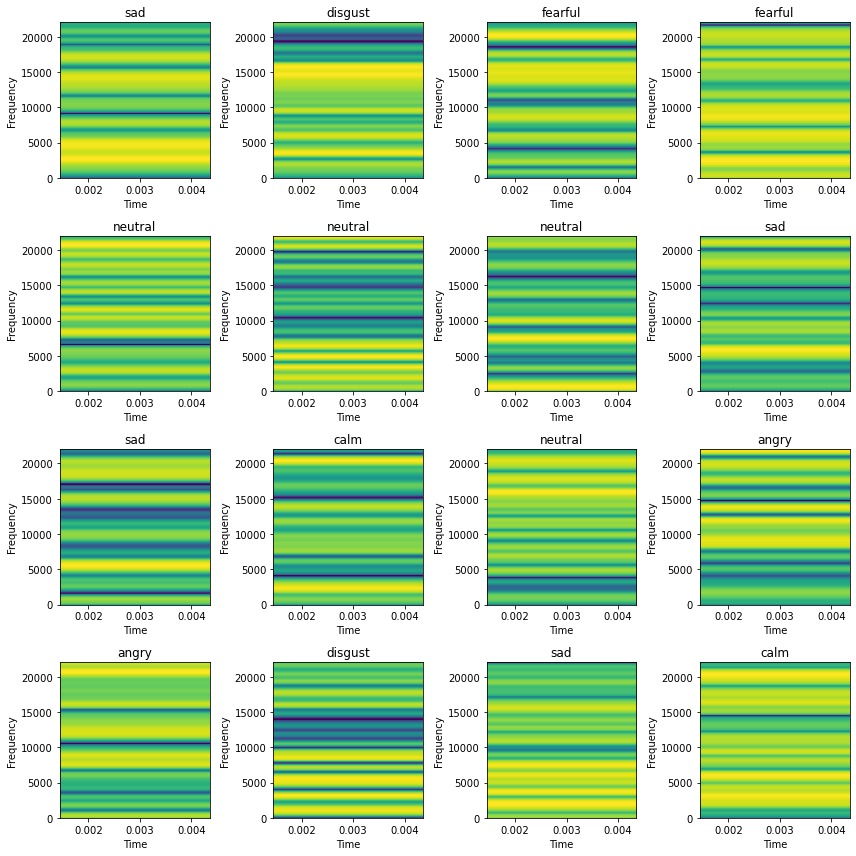

In [66]:
import matplotlib.pyplot as plt
import torch

# Assuming you have a list of 16 tensors
# Replace this with your actual list of tensors
tensor_list = atten_map[-1]

# Create a 4x4 subplot grid
fig, axes = plt.subplots(4, 4, figsize=(12, 12))

# Iterate through the tensors and plot them in subplots
for i, tensor_data in enumerate(tensor_list):
    # Convert the tensor to a numpy array
    data_array = tensor_data.cpu().detach().numpy()

    # Calculate the row and column indices for the subplot grid
    row_index = i // 4
    col_index = i % 4

    # Plot the spectrogram in the current subplot
    axes[row_index, col_index].specgram(data_array.flatten(), Fs=44100)  # Adjust Fs accordingly
    axes[row_index, col_index].set_title(emotion_names[i])
    axes[row_index, col_index].set_xlabel('Time')
    axes[row_index, col_index].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [62]:
# ----------------------------
# Inference
# ----------------------------
def inference (model, val_dl):
  correct_prediction = 0
  total_prediction = 0

  # Disable gradient updates
  with torch.no_grad():
    for data in val_dl:
      # Get the input features and target labels, and put them on the GPU
      inputs, labels = data[0].to(device), data[1].to(device)

      # Normalize the inputs
      inputs_m, inputs_s = inputs.mean(), inputs.std()
      inputs = (inputs - inputs_m) / inputs_s

      # Get predictions
      outputs, atten_map = model(inputs)

      # Get the predicted class with the highest score
      _, prediction = torch.max(outputs,1)
      # Count of predictions that matched the target label
      correct_prediction += (prediction == labels).sum().item()
      total_prediction += prediction.shape[0]

  acc = correct_prediction/total_prediction
  print(f'Accuracy: {acc:.2f}, Total items: {total_prediction}')

In [63]:
bestmodel = AudioClassifier()
bestmodel.load_state_dict(torch.load(r'C:\Users\User\9444_WeightDancers_proj\best_model_CNN_Self_Dot.pth'))
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
bestmodel = bestmodel.to(device)
# Check that it is on Cuda
next(bestmodel.parameters()).device

device(type='cuda', index=0)

In [64]:
# Run inference on trained model with the validation set
inference(bestmodel, val_dl)

Accuracy: 0.74, Total items: 288


### Taking self attention in Convolutional Neural Networks

https://medium.com/mlearning-ai/self-attention-in-convolutional-neural-networks-172d947afc00

In [24]:
!pip install fastai

  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.5.0
    Uninstalling typing-extensions-4.5.0:
      Successfully uninstalled typing-extensions-4.5.0
  Attempting uninstall: colorama
    Found existing installation: colorama 0.4.4
    Uninstalling colorama-0.4.4:
      Successfully uninstalled colorama-0.4.4
  Attempting uninstall: smart-open
    Found existing installation: smart-open 5.1.0
    Uninstalling smart-open-5.1.0:
      Successfully uninstalled smart-open-5.1.0


In [25]:
import torch
from torch import tensor
from torch.nn import Module, Parameter
from torch.nn.functional import softmax

from fastai.layers import ConvLayer, NormType


class SelfAttention(Module):
    "Self attention layer for `n_channels`."
    def __init__(self, n_channels):
        super(SelfAttention, self).__init__()
        self.query,self.key,self.value = [self._conv(n_channels, c) for c in (n_channels//8,n_channels//8,n_channels)]
        self.gamma = nn.Parameter(tensor([0.]))

    def _conv(self,n_in,n_out):
        return ConvLayer(n_in, n_out, ks=1, ndim=1, norm_type=NormType.Spectral, act_cls=None, bias=False)

    def forward(self, x):
        #Notation from the paper.
        size = x.size()
        x = x.view(*size[:2],-1)
        f,g,h = self.query(x),self.key(x),self.value(x)
        beta = F.softmax(torch.bmm(f.transpose(1,2), g), dim=1)
        o = self.gamma * torch.bmm(h, beta) + x
        return o.view(*size).contiguous()

In [26]:
import torch.nn.functional as F
from torch.nn import init

# ----------------------------
# Audio Classification Model
# ----------------------------
class AudioClassifier (nn.Module):
    # ----------------------------
    # Build the model architecture
    # ----------------------------
    def __init__(self):
        super().__init__()
        conv_layers = []

        # First Convolution Block with Relu and Batch Norm. Use Kaiming Initialization
        self.conv1 = nn.Conv2d(2, 8, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
        self.relu1 = nn.ReLU()
        self.bn1 = nn.BatchNorm2d(8)
        
        ##weight initialization by kaiming's method
        init.kaiming_normal_(self.conv1.weight, a=0.1)
        
        ##First Convolution Attention layer
        self.selfattention1 = SelfAttention(n_channels = 8)
        self.conv1.bias.data.zero_()
        conv_layers += [self.conv1, self.relu1, self.bn1, self.selfattention1]

        # Second Convolution Block
        self.conv2 = nn.Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.relu2 = nn.ReLU()
        self.bn2 = nn.BatchNorm2d(16)
        init.kaiming_normal_(self.conv2.weight, a=0.1)
        
        ##Second Convolution Attention layer
        self.selfattention2 = SelfAttention(n_channels = 16)
        self.conv2.bias.data.zero_()
        conv_layers += [self.conv2, self.relu2, self.bn2, self.selfattention2]

        # Second Convolution Block
        self.conv3 = nn.Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.relu3 = nn.ReLU()
        self.bn3 = nn.BatchNorm2d(32)
        init.kaiming_normal_(self.conv3.weight, a=0.1)
        
        ##Third Convolution Attention Layer
        self.selfattention3 = SelfAttention(n_channels = 32)
        self.conv3.bias.data.zero_()

        conv_layers += [self.conv3, self.relu3, self.bn3, self.selfattention3]

        # Third Convolution Block
        self.conv4 = nn.Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.relu4 = nn.ReLU()
        self.bn4 = nn.BatchNorm2d(64)
        init.kaiming_normal_(self.conv4.weight, a=0.1)
        
        ##Fourth Convolution Attention Layer
        self.selfattention4 = SelfAttention(n_channels = 64)
        self.conv4.bias.data.zero_()
        conv_layers += [self.conv4, self.relu4, self.bn4, self.selfattention4]

        # Linear Classifier
        self.ap = nn.AdaptiveAvgPool2d(output_size=1)
        self.lin = nn.Linear(in_features=64, out_features=8)

        # Wrap the Convolutional Blocks
        self.conv = nn.Sequential(*conv_layers)

    # ----------------------------
    # Forward pass computations
    # ----------------------------
    def forward(self, x):
        # Run the convolutional blocks
        x = self.conv(x)

        # Adaptive pool and flatten for input to linear layer
        x = self.ap(x)
        x = x.view(x.shape[0], -1)

        # Linear layer
        x = self.lin(x)

        # Final output
        return x

# Create the model and put it on the GPU if available
myModel = AudioClassifier()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
myModel = myModel.to(device)
# Check that it is on Cuda
next(myModel.parameters()).device

device(type='cuda', index=0)

#### Training of the CNN + Convolutional Attention

In [27]:
def checkpoint(model, filename):
    torch.save(model.state_dict(), filename)

def resume(model, filename):
    model.load_state_dict(torch.load(filename))

In [28]:
# ----------------------------
# Training Loop
# ----------------------------
def training(model, train_dl, num_epochs):

  # Loss Function, Optimizer and Scheduler
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
  scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.001,
                                                steps_per_epoch=int(len(train_dl)),
                                                epochs=num_epochs,anneal_strategy='linear')
  early_stop_thresh = 10
  best_accuracy = -1
  best_epoch = -1
  map_list = []
  # Repeat for each epoch
  for epoch in range(num_epochs):
    running_loss = 0.0
    correct_prediction = 0
    total_prediction = 0

    # Repeat for each batch in the training set

    for i, data in enumerate(train_dl):
        # Get the input features and target labels, and put them on the GPU
        #print(data)
        #inputs, labels = data[0], torch.tensor(data[1])

        inputs = data[0].to(device)
        labels = data[1].to(device)

        # Normalize the inputs
        inputs_m, inputs_s = inputs.mean(), inputs.std()
        inputs = (inputs - inputs_m) / inputs_s

        # Zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)

        #print(outputs)



        labels_tens = torch.tensor(labels)

        #print(labels_tens)

        loss = criterion(outputs, labels_tens)
        loss.backward()
        optimizer.step()
        scheduler.step()

        # Keep stats for Loss and Accuracy
        running_loss += loss.item()

        # Get the predicted class with the highest score
        _, prediction = torch.max(outputs,1)
        # Count of predictions that matched the target label
        correct_prediction += (prediction == labels).sum().item()
        total_prediction += prediction.shape[0]

        #if i % 10 == 0:    # print every 10 mini-batches
        #    print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 10))





    # Print stats at the end of the epoch
    num_batches = len(train_dl)
    avg_loss = running_loss / num_batches
    acc = correct_prediction/total_prediction
    print(f'Epoch: {epoch}, Loss: {avg_loss:.2f}, Accuracy: {acc:.2f}')


    if acc > best_accuracy:
      best_accuracy = acc
      best_epoch = epoch
      checkpoint(myModel, 'best_model_CNN_Conv_attn.pth')
    elif epoch - best_epoch > early_stop_thresh:
      print(f'Stopping early at epoch {epoch}')
      #print(map_list)
      break
    else:
      checkpoint(myModel, 'last_model_CNN_Conv_attn.pth')



num_epochs=150  # Just for demo, adjust this higher.
training(myModel, train_dl, num_epochs)

C:\Users\User\AppData\Local\Temp\ipykernel_25412\3700501745.py:46: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels_tens = torch.tensor(labels)


Epoch: 0, Loss: 2.06, Accuracy: 0.14
Epoch: 1, Loss: 1.97, Accuracy: 0.25
Epoch: 2, Loss: 1.91, Accuracy: 0.26
Epoch: 3, Loss: 1.86, Accuracy: 0.28
Epoch: 4, Loss: 1.84, Accuracy: 0.28
Epoch: 5, Loss: 1.81, Accuracy: 0.29
Epoch: 6, Loss: 1.78, Accuracy: 0.30
Epoch: 7, Loss: 1.77, Accuracy: 0.33
Epoch: 8, Loss: 1.74, Accuracy: 0.32
Epoch: 9, Loss: 1.72, Accuracy: 0.34
Epoch: 10, Loss: 1.69, Accuracy: 0.34
Epoch: 11, Loss: 1.66, Accuracy: 0.36
Epoch: 12, Loss: 1.64, Accuracy: 0.37
Epoch: 13, Loss: 1.61, Accuracy: 0.39
Epoch: 14, Loss: 1.58, Accuracy: 0.41
Epoch: 15, Loss: 1.57, Accuracy: 0.40
Epoch: 16, Loss: 1.51, Accuracy: 0.43
Epoch: 17, Loss: 1.46, Accuracy: 0.45
Epoch: 18, Loss: 1.45, Accuracy: 0.45
Epoch: 19, Loss: 1.43, Accuracy: 0.46
Epoch: 20, Loss: 1.38, Accuracy: 0.48
Epoch: 21, Loss: 1.36, Accuracy: 0.50
Epoch: 22, Loss: 1.31, Accuracy: 0.52
Epoch: 23, Loss: 1.29, Accuracy: 0.52
Epoch: 24, Loss: 1.25, Accuracy: 0.56
Epoch: 25, Loss: 1.19, Accuracy: 0.58
Epoch: 26, Loss: 1.13,

In [29]:
resume(myModel, 'best_model_CNN_Conv_attn.pth')

##### Result of CNN+ Convolution Attention on Validation Dataset

In [30]:
# ----------------------------
# Inference
# ----------------------------
def inference (model, val_dl):
  correct_prediction = 0
  total_prediction = 0

  # Disable gradient updates
  with torch.no_grad():
    for data in val_dl:
      # Get the input features and target labels, and put them on the GPU
      inputs, labels = data[0].to(device), data[1].to(device)

      # Normalize the inputs
      inputs_m, inputs_s = inputs.mean(), inputs.std()
      inputs = (inputs - inputs_m) / inputs_s

      # Get predictions
      outputs = model(inputs)

      # Get the predicted class with the highest score
      _, prediction = torch.max(outputs,1)
      # Count of predictions that matched the target label
      correct_prediction += (prediction == labels).sum().item()
      total_prediction += prediction.shape[0]

  acc = correct_prediction/total_prediction
  print(f'Accuracy: {acc:.2f}, Total items: {total_prediction}')

In [31]:
# Run inference on trained model with the validation set
inference(myModel, val_dl)

Accuracy: 0.72, Total items: 288
